In [20]:
# pip install pinecone-client

In [2]:
import pinecone

### Important Note:
    Before using this notebook, you will need to make an account on Pinecone platform and copy the api_key and environment value from your account into the next cell to be able to connect to a pinecone instance.

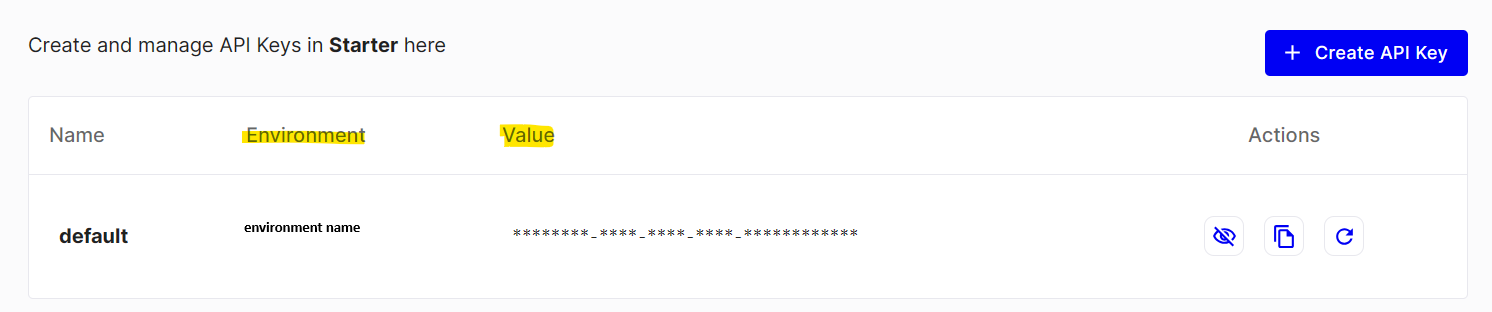

## Creating an Index database on pinecone platform

In [23]:
pinecone.init(api_key = "your key", environment = "your env")

In [4]:
pinecone.create_index(name = "starter", dimension = 3) # name is the name of your database

In [5]:
pinecone.list_indexes()

['starter']

## Inserting Data

In [6]:
vectors= [[1, 3, 4], [5, 6, 7], [8, 9, 0]]

In [7]:
vect_ids = ['vec1', 'vec2', 'vec3']

In [8]:
idx = pinecone.Index('starter')

In [9]:
idx.upsert([
    ('vec1', [1, 3, 4]),   # tuple . with id and vector
    ('vec2', [5, 6, 7]),
    ('vec3', [8, 9, 0])
    
])  # list of tuples each of which contains vector ids and vector values

{'upserted_count': 3}

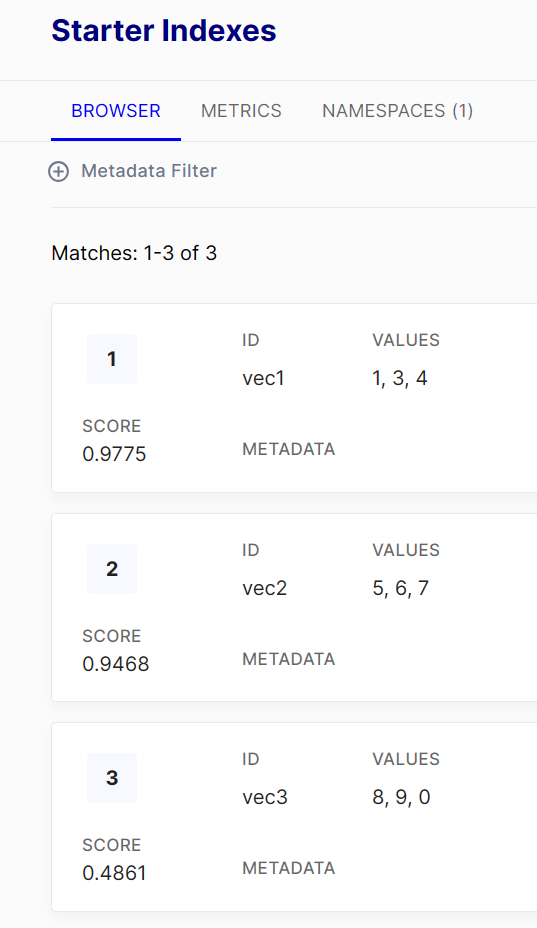

## Updating

In [10]:
idx.upsert(vectors = [
    ("A", [0.1, 0.1, 0.1]),
("B", [0.2, 0.2, 0.2]),
("C", [0.3, 0.3, 0.3]),
("D", [0.4, 0.4, 0.4]),
("E", [0.5, 0.5, 0.5])
])

{'upserted_count': 5}

Now here we update vector E with new values [0.55 0.55 0.55]

In [11]:
idx.update(id="E", values=[0.55, 0.55, 0.55])

{}

## Querying

In [12]:
idx.upsert([
    ('vec1', [1, 3, 44]),   # update because vec1 is already in DB
    ('vec2', [5, 6, 77]),   # update
    ('vec33', [8, 9, 0])    # insert
    
    
])  # list of vectors

{'upserted_count': 3}

### After running the above cell the upserted vectors in Pinecone DB get updated or Inserted
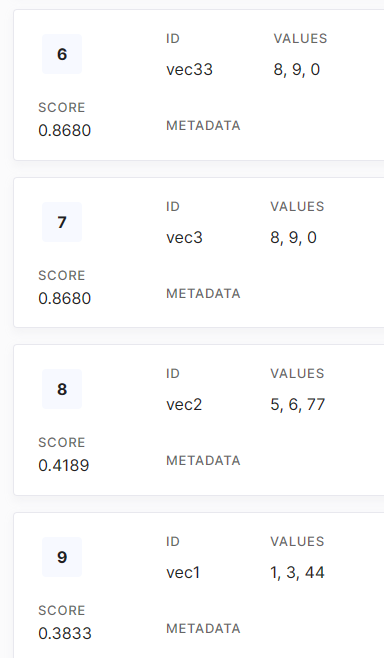

In [13]:
idx.query([0, 0 , 0], top_k=5, include_values = True) 

{'matches': [{'id': 'vec3', 'score': 0.0, 'values': [8.0, 9.0, 0.0]},
             {'id': 'vec1', 'score': 0.0, 'values': [1.0, 3.0, 4.0]},
             {'id': 'A', 'score': 0.0, 'values': [0.1, 0.1, 0.1]},
             {'id': 'C', 'score': 0.0, 'values': [0.3, 0.3, 0.3]},
             {'id': 'vec2', 'score': 0.0, 'values': [5.0, 6.0, 7.0]}],
 'namespace': ''}

#### Note: The query metric is based on cosine similarity 

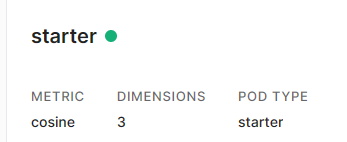

## Fetch Vector by ID

###### 1. Fetch a vector
    
###### 2. Fetch a list of vectors

In [14]:
idx.fetch(ids=["vec1"])

{'namespace': '',
 'vectors': {'vec1': {'id': 'vec1', 'values': [1.0, 3.0, 44.0]}}}

In [15]:
idx.fetch(ids=["vec1", "vec2"])

{'namespace': '',
 'vectors': {'vec1': {'id': 'vec1', 'values': [1.0, 3.0, 44.0]},
             'vec2': {'id': 'vec2', 'values': [5.0, 6.0, 77.0]}}}

## Delete a Vector 

In [16]:
idx.delete(ids = ['vec33'])  # 'vec1', vec2, vec3, vec33

{}

In [17]:
idx.delete(ids = ['vec1'])

{}

In [18]:
idx.delete(ids = ['vec33333']) 

{}

- Note: if a vector id dose not exist it won't give an error

In [19]:
idx.delete(delete_all=True)

{}

- Note: If delete_all=True: delets all the vectors in the db